In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# MODELLING

The gene expression data will be investigated hoping to find clusters, which are representative for the histology of cancertype. Further, we can investigate whether there are different patterns for male and females and whether the tumor size has an impact on which genes are expressed.

## Data preparation
Data was checked for skewness and then transformed to be normal shaped. Standardization was conducted as preparation step for dimensionality reduction.

## Dimensionality reduction
The following techniques were considered:
- PCA
- MDS
- spectral embedding
- spectral clustering
- tSNE

## Clustering
Clustering techniques discussed:
- k-means
- Hierarchical agglomerative clustering
- DBSCAN

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

## Load concatenated dataset

In [3]:
df = pd.read_csv('Clinical_Gene_Exp.csv')

In [4]:
df.head()

,Unnamed: 0,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter,"('AFFX-BioB-3_at',)","('AFFX-BioB-5_at',)","('AFFX-BioB-M_at',)","('AFFX-BioC-3_at',)","('AFFX-BioC-5_at',)",...,"('merck2-Z41436_at',)","('merck2-Z43503_at',)","('merck2-Z47244_x_at',)","('merck2-Z47250_x_at',)","('merck2-Z48501_s_at',)","('merck2-Z48633_s_at',)","('merck2-Z70222_a_at',)","('merck2-Z70608_x_at',)","('merck2-Z72499_a_at',)","('merck2-Z75331_a_at',)"
0,0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0,7.376915,6.984530,7.330576,10.922741,11.032030,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3,8.024915,7.427048,8.010530,11.390638,11.533338,...,7.552333,3.578359,5.516440,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,2,Non-Small Cell,Left Lower Lobe,0,11.0,7.522543,7.077207,7.334551,10.936703,11.018510,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.586540,6.112918,1.753519,9.515653,6.556233
3,3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,3.5,7.152864,6.849513,7.143286,10.791909,10.875259,...,7.136409,2.904756,5.954062,6.738276,11.240300,10.257621,6.276813,1.889742,9.383670,7.293852
4,4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8,7.211031,6.753131,7.077163,10.701328,10.823792,...,7.667150,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336


## Prepare the data
Extract the features, which shall be used for clustering from the ones, which can be used for colour coding.

In [5]:
labels = df.iloc[:, 1:5]
labels.head()

,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter
0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0
1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3
2,Non-Small Cell,Left Lower Lobe,0,11.0
3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,3.5
4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8


In [6]:
labels['characteristics.tag.histology'].unique()

array(['Squamous Cell Carcinoma, NOS', 'Adenocarcinoma, Papillary, NOS',
       'Non-Small Cell',
       'Papillary Type AND \xa0\xa0\xa0\xa0 Adenocarcinoma, Bronchiolo-alveolar Features',
       'Adenocarcinoma, NOS', 'Solid Type And Acinar',
       'Adenocarcinoma, Mixed',
       'Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features',
       'Adenocarcinoma, Acinar Type',
       'Squamous Cell Carcinoma, Other (Specify) with adeno features',
       'Adenocarcinoma With Mucinous Features',
       'Adenocarcinoma, Bronchiolo-alveolar Features',
       'Adenocarcinoma With Papillary Features',
       'Carcinoma, Large Cell, Neuroendocrine',
       'Squamous Cell Carcinoma, Other (Specify)endobronchial',
       'Squamous Cell Carcinoma, Papillary',
       'Non-Small Cell, Pleomorphic Type'], dtype=object)

There are three main types: squamous cell carcinoma and adenocarcinoma with histological subtypes and Non-Small Cell carcinoma. It might be interesting to conduct hierarchical chlustering to see how the relation between histology subtypes is based on the patterns found with clustering algorithm. From the labelling the assumption would be to see three separated clusters with maybe subclusters. Therfore an additional column is introduced with only squamous cell carcinoma and adenocarcinoma.

Furthermore, the location of the tumor, the gender and the diameter of the tumor could play a role in cluster generation and are therefore used for lateron color-coding.

In [49]:
# group labels in bigger group based on similarity in their naming
labels['hist_tags'] = labels['characteristics.tag.histology'].str.extract('(Squamous Cell Carcinoma|Adenocarcinoma|Non-Small Cell)', expand=True)
labels.head()

,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter,hist_tags
0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0,Squamous Cell Carcinoma
1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3,Adenocarcinoma
2,Non-Small Cell,Left Lower Lobe,0,11.0,Non-Small Cell
3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,3.5,Adenocarcinoma
4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8,Squamous Cell Carcinoma


In [70]:
labels[labels.hist_tags.isnull()]

,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter,hist_tags
8,Solid Type And Acinar,Right Lower Lobe,0,4.2,NaN
9,Solid Type And Acinar,Left Upper Lobe,0,6.2,NaN
59,"Carcinoma, Large Cell, Neuroendocrine",Right Lower Lobe,1,7.2,NaN


In [86]:
# call them others
labels.fillna('other',inplace=True)

In [7]:
data = df.iloc[:, 5:]
data.head()

,"('AFFX-BioB-3_at',)","('AFFX-BioB-5_at',)","('AFFX-BioB-M_at',)","('AFFX-BioC-3_at',)","('AFFX-BioC-5_at',)","('AFFX-BioDn-3_at',)","('AFFX-BioDn-5_at',)","('AFFX-BkGr-GC03_at',)","('AFFX-BkGr-GC04_at',)","('AFFX-BkGr-GC05_at',)",...,"('merck2-Z41436_at',)","('merck2-Z43503_at',)","('merck2-Z47244_x_at',)","('merck2-Z47250_x_at',)","('merck2-Z48501_s_at',)","('merck2-Z48633_s_at',)","('merck2-Z70222_a_at',)","('merck2-Z70608_x_at',)","('merck2-Z72499_a_at',)","('merck2-Z75331_a_at',)"
0,7.376915,6.984530,7.330576,10.922741,11.032030,13.411168,12.625445,1.464847,1.416673,1.438285,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,8.024915,7.427048,8.010530,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,1.403564,...,7.552333,3.578359,5.516440,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,7.522543,7.077207,7.334551,10.936703,11.018510,13.360017,12.540647,1.355337,1.343599,1.306212,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.586540,6.112918,1.753519,9.515653,6.556233
3,7.152864,6.849513,7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,1.354529,...,7.136409,2.904756,5.954062,6.738276,11.240300,10.257621,6.276813,1.889742,9.383670,7.293852
4,7.211031,6.753131,7.077163,10.701328,10.823792,13.340075,12.420624,1.296788,1.244117,1.291959,...,7.667150,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336


In [25]:
skew_columns = (data.skew().sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
len(skew_columns.index)

16116

In [9]:
to_transform = data[skew_columns.index]
to_transform

,"('merck-NC_001526_ORF_1178_at',)","('merck-NC_001526_ORF_1180_at',)","('merck-NC_001526_ORF_1182_at',)","('merck-BX648957_at',)","('merck-NC_001526_ORF_1179_at',)","('merck-NM_003284_s_at',)","('merck-BC067883_at',)","('merck-AK130854_at',)","('merck-BC045546_at',)","('merck-NM_003008_at',)",...,"('merck2-BG503223_at',)","('merck2-AL831965_x_at',)","('merck2-BC128418_at',)","('merck-XM_379424_at',)","('merck2-CB988589_at',)","('merck-NM_152539_at',)","('merck-ENST00000378906_at',)","('merck-AK127029_at',)","('merck2-AL713762_at',)","('merck2-BE222032_at',)"
0,1.751089,1.923739,1.779409,2.947517,2.166352,3.129840,1.891794,2.212246,1.981491,2.192580,...,1.861109,3.530079,5.139286,2.439108,4.038099,2.375657,4.644862,2.282349,2.654022,3.728412
1,1.734086,2.036465,2.421049,2.638011,2.422869,3.315131,1.806821,2.226301,1.757842,2.527742,...,1.898473,3.235672,5.322348,2.438386,3.593132,3.515497,4.833261,1.982835,2.325837,3.256609
2,1.713741,2.117503,1.900508,3.008557,2.230895,3.585259,1.819067,2.417597,9.596876,2.060241,...,1.750539,3.427685,5.369649,2.443685,3.477359,2.580502,4.828437,1.738827,2.971469,3.756250
3,1.430930,2.036134,1.898905,2.560518,1.945517,3.460781,1.738263,2.041107,1.916549,2.250460,...,1.562808,2.450362,6.435685,2.630789,3.659406,2.521466,4.464399,1.744224,3.935132,3.319397
4,9.513824,10.727684,8.923205,2.747191,9.735626,3.443854,1.602254,2.068401,1.584063,8.464755,...,1.738284,4.933662,5.478771,2.554018,4.622671,2.735747,4.542463,1.875170,3.185894,3.756722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.861992,1.954489,2.087652,2.622204,1.905323,3.090534,1.791824,2.370415,1.704223,2.193021,...,1.805556,3.140600,5.444808,2.663773,3.673200,2.839320,4.273460,1.561808,3.427227,3.794744
85,1.897688,2.309729,1.995183,2.574371,1.835827,3.536945,1.635466,2.035348,1.687369,2.080671,...,1.809376,3.256154,5.569662,2.688792,4.508171,2.395854,4.615754,2.118412,4.893751,3.584508
86,1.731126,2.125028,1.896516,2.508667,2.334790,3.331077,1.538350,2.482759,2.040027,1.778554,...,1.784179,3.208765,4.962811,2.647916,4.053721,2.270624,4.951484,2.011435,3.154695,3.219972
87,1.811532,2.522141,2.028475,3.182315,1.872325,3.034610,1.503894,2.375632,1.726513,2.667143,...,1.748919,5.646401,5.756024,2.322542,4.833163,2.517216,4.896159,1.568157,4.135101,3.748645


In [27]:
all_values = set(data.columns)
skew_set = set(skew_columns.index)
not_skew_set = all_values - skew_set
not_skew = list(not_skew_set)
len(not_skew)

44491

In [28]:
not_transform = data[not_skew]
not_transform

,"('merck-NM_018191_at',)","('merck-BX537989_a_at',)","('merck-XM_936534_x_at',)","('merck-AK000792_at',)","('merck-CB995207_at',)","('merck-CR609491_a_at',)","('merck-NC_001405_ORF_1036_s_at',)","('merck-CR602633_at',)","('merck-BC039516_s_at',)","('merck-NM_001018137_s_at',)",...,"('merck2-NM_001100111_at',)","('merck-BC002557_s_at',)","('merck-AL832022_at',)","('merck-BE296045_s_at',)","('merck-DN991517_a_at',)","('merck-AI797618_at',)","('merck2-BM551988_at',)","('merck-NM_012201_a_at',)","('merck2-BX537623_at',)","('merck-BC030713_at',)"
0,6.534763,7.345812,5.366290,4.727383,4.502786,9.540466,3.163743,7.260133,3.516949,12.250090,...,2.758667,6.108059,10.152235,5.168567,2.711582,2.304693,5.042322,9.151963,7.995034,6.475981
1,5.968178,7.212086,4.649927,5.166784,4.778664,8.930900,3.587144,7.962110,4.077570,11.736072,...,2.614659,6.574448,9.423644,3.892430,3.478187,2.491529,7.330315,8.614623,8.023463,9.089629
2,7.317066,7.271612,6.067162,4.996758,4.872086,8.800464,3.637001,7.578126,4.118933,12.358251,...,2.786349,6.508316,10.386488,5.575419,3.124884,2.296351,7.519649,8.673871,8.491518,5.262965
3,7.054466,7.283732,5.245580,4.588544,4.540818,9.050195,3.067438,7.207969,3.808064,11.688652,...,2.684094,5.864536,9.728469,4.824771,2.628500,2.033436,7.948130,8.814025,8.589391,10.151060
4,6.376612,7.777416,5.207562,5.199795,4.475618,9.246022,3.691017,7.525660,4.245912,11.790216,...,2.627397,6.831546,9.304371,5.267344,3.082911,2.469436,6.192373,9.180749,8.132856,8.047961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,5.832808,8.306647,5.016900,4.711335,4.590254,8.940711,3.071160,7.078210,4.417282,12.018032,...,2.275262,6.690515,8.168146,5.491916,3.430895,2.116973,6.291399,8.913141,7.799542,6.736960
85,5.883920,7.904433,5.309542,2.823740,4.854077,9.396106,3.444416,7.502999,3.663136,12.369801,...,2.539165,6.393109,8.629389,6.542942,2.739484,2.176759,5.639600,8.894873,7.454250,6.545462
86,6.724430,6.241219,5.368758,4.741781,4.071904,8.613266,3.088372,7.267659,3.700851,12.333474,...,2.263516,6.206579,9.624109,5.097674,3.456101,2.031276,4.615941,8.186181,8.309754,4.214665
87,6.109438,8.813375,5.731733,3.294613,4.699670,10.209238,3.252470,7.397128,3.667728,11.917059,...,2.809537,6.256366,9.000384,4.881319,3.278326,2.105429,5.820353,8.966076,7.677731,6.522926


As previously seen, the data is strongly shifted to the left side. To shift the data towards normal distribution either log transformation or power transform can be used. Here I am using Yeo-Johnson (default, which allows to handle 0s and negative values) transformation (Power transform from scikit learn). The here conducted approach, standardizes as well to mean = 0 and a unit variance. Transformaion is conducted in place.

In [29]:
from sklearn.preprocessing import power_transform

power_transform(to_transform, method = 'yeo-johnson', copy = False)


C:\Users\chiar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 0.03038148, -1.54681499, -1.83120456, ...,  1.60454794,
        -1.08818059,  0.06213251],
       [-0.0811749 , -0.67534248,  1.65553644, ...,  0.41889106,
        -2.00593658, -1.70170671],
       [-0.22015815, -0.15896177, -0.75523945, ..., -0.98945414,
        -0.33794457,  0.14948761],
       ...,
       [-0.10101654, -0.11500139, -0.78613669, ...,  0.5539392 ,
         0.04543743, -1.86506428],
       [ 0.3956926 ,  1.51647973,  0.10216502, ..., -2.33409513,
         1.65252595,  0.12578364],
       [-0.92815969,  0.68800017, -0.73660548, ...,  0.54180425,
        -0.67854643,  1.00664129]])

In [30]:
to_transform

,"('merck-NC_001526_ORF_1178_at',)","('merck-NC_001526_ORF_1180_at',)","('merck-NC_001526_ORF_1182_at',)","('merck-BX648957_at',)","('merck-NC_001526_ORF_1179_at',)","('merck-NM_003284_s_at',)","('merck-BC067883_at',)","('merck-AK130854_at',)","('merck-BC045546_at',)","('merck-NM_003008_at',)",...,"('merck2-BG503223_at',)","('merck2-AL831965_x_at',)","('merck2-BC128418_at',)","('merck-XM_379424_at',)","('merck2-CB988589_at',)","('merck-NM_152539_at',)","('merck-ENST00000378906_at',)","('merck-AK127029_at',)","('merck2-AL713762_at',)","('merck2-BE222032_at',)"
0,0.030381,-1.546815,-1.831205,1.281970,0.450178,-1.408027,1.053844,-0.169766,1.017636,0.676342,...,1.254614,-0.015842,-1.443560,-1.158345,0.555936,-1.392791,-0.272438,1.604548,-1.088181,0.062133
1,-0.081175,-0.675342,1.655536,0.002492,1.243819,-0.308315,0.726157,-0.088928,0.047040,1.618912,...,1.440834,-0.412405,-0.754943,-1.163520,-0.595960,2.373331,0.387752,0.418891,-2.005937,-1.701707
2,-0.220158,-0.158962,-0.755239,1.460285,0.679632,0.818967,0.776551,0.794405,2.693263,0.118111,...,0.645397,-0.147643,-0.590120,-1.125685,-0.973289,-0.442521,0.372198,-0.989454,-0.337945,0.149488
3,-2.985849,-0.677620,-0.767611,-0.452364,-0.538880,0.356615,0.421995,-1.395387,0.786793,0.880985,...,-0.631961,-1.810515,2.088980,0.054504,-0.396326,-0.699375,-1.021011,-0.952484,1.374020,-1.431750
4,3.636017,3.503463,3.246591,0.539143,3.433328,0.286771,-0.312070,-1.165640,-1.181490,3.135214,...,0.572014,1.323296,-0.228591,-0.395343,1.572380,0.175512,-0.681719,-0.141355,0.107542,0.150957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.667016,-1.289084,0.424359,-0.084846,-0.760770,-1.686949,0.662880,0.609406,-0.275594,0.677983,...,0.959976,-0.552812,-0.338404,0.234691,-0.356170,0.546622,-1.965368,-2.391513,0.559836,0.267684
85,0.842553,0.789553,-0.098091,-0.365951,-1.182171,0.649672,-0.114605,-1.445803,-0.386367,0.213545,...,0.980954,-0.382997,0.053864,0.366470,1.406044,-1.291358,-0.384876,1.014532,2.545262,-0.416232
86,-0.101017,-0.115001,-0.786137,-0.797505,1.004784,-0.227977,-0.730681,1.021305,1.198104,-1.672979,...,0.840557,-0.451485,-2.192890,0.148999,0.589336,-1.951068,0.748968,0.553939,0.045437,-1.865064
87,0.395693,1.516480,0.102165,1.876268,-0.954592,-2.116518,-0.979832,0.630794,-0.136174,1.879004,...,0.635767,1.782442,0.585023,-2.062037,1.845539,-0.718370,0.584580,-2.334095,1.652526,0.125784


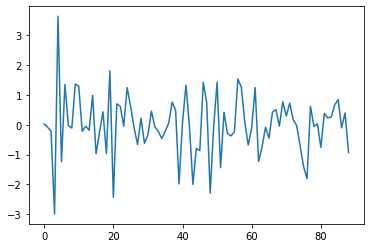

In [31]:
# check distribution
dist1 = to_transform["('merck-NC_001526_ORF_1178_at',)"].plot()

In [32]:
# concatenate the two subsets and standardize
data1 = pd.concat([to_transform, not_transform], axis = 1)
data1.head()

,"('merck-NC_001526_ORF_1178_at',)","('merck-NC_001526_ORF_1180_at',)","('merck-NC_001526_ORF_1182_at',)","('merck-BX648957_at',)","('merck-NC_001526_ORF_1179_at',)","('merck-NM_003284_s_at',)","('merck-BC067883_at',)","('merck-AK130854_at',)","('merck-BC045546_at',)","('merck-NM_003008_at',)",...,"('merck2-NM_001100111_at',)","('merck-BC002557_s_at',)","('merck-AL832022_at',)","('merck-BE296045_s_at',)","('merck-DN991517_a_at',)","('merck-AI797618_at',)","('merck2-BM551988_at',)","('merck-NM_012201_a_at',)","('merck2-BX537623_at',)","('merck-BC030713_at',)"
0,0.030381,-1.546815,-1.831205,1.281970,0.450178,-1.408027,1.053844,-0.169766,1.017636,0.676342,...,2.758667,6.108059,10.152235,5.168567,2.711582,2.304693,5.042322,9.151963,7.995034,6.475981
1,-0.081175,-0.675342,1.655536,0.002492,1.243819,-0.308315,0.726157,-0.088928,0.047040,1.618912,...,2.614659,6.574448,9.423644,3.892430,3.478187,2.491529,7.330315,8.614623,8.023463,9.089629
2,-0.220158,-0.158962,-0.755239,1.460285,0.679632,0.818967,0.776551,0.794405,2.693263,0.118111,...,2.786349,6.508316,10.386488,5.575419,3.124884,2.296351,7.519649,8.673871,8.491518,5.262965
3,-2.985849,-0.677620,-0.767611,-0.452364,-0.538880,0.356615,0.421995,-1.395387,0.786793,0.880985,...,2.684094,5.864536,9.728469,4.824771,2.628500,2.033436,7.948130,8.814025,8.589391,10.151060
4,3.636017,3.503463,3.246591,0.539143,3.433328,0.286771,-0.312070,-1.165640,-1.181490,3.135214,...,2.627397,6.831546,9.304371,5.267344,3.082911,2.469436,6.192373,9.180749,8.132856,8.047961


In [33]:
X = data.values

In [34]:
print(X.shape)
X.dtype

(89, 60607)


dtype('float64')

In [35]:
from sklearn.preprocessing import StandardScaler
# standardize X
X = StandardScaler().fit_transform(X)

## Dimensionality Reduction

Gene expression data is high dimensional, big data. To visualise the data and to form clusters a reduction of the dimensionality is required. The standard procedure seems to be PCA, however this might not necessarily be the optimal choice but just the best known strategy amonst biologists. The gene expression data for this project was acquired using affymetrix microchips. This technology has the following drawbacks:
- only known genes (for which markers are coated to the well) are detected and measured
- we measure intensities, for very high intensities there could be blending out artificats arise for the genes coated to the neighboring area
This two sources of inaccurracy may introduce noise and may impede the analysis. It might decrease the covariances, which affects the PCA outcome as well as decreases the distance in intensity levels of close to each other coated genes. Keeping this in mind, several dimensionality reduction techniques as well as clustering techniques are tested. 

Dimensionality reduction:
- PCA (reduce to 2 dimensions to visualize, reduce to as many principle components are needed to explain 85% of the variance and use all these components as input for clustering)
- Multidmensional scaling
- Spectral clustering

Clustering:
- hierarchical to see whether some histologies have hidden factors in common
- k-means as basic method
- 

In [38]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
print(principalDf.shape)
principalDf.head()

(89, 57)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,6.760329,-141.480051,75.042803,30.232882,-23.051964,-1.352106,30.262335,-35.331611,60.763064,-7.459005,...,-22.322967,-36.335866,-2.828949,-10.344636,15.547158,-37.221972,-17.749164,-14.207620,-45.470199,14.800038
1,21.130335,134.475577,27.248473,90.492174,-38.342452,-63.728887,10.604486,9.379915,-2.399403,47.993608,...,-5.605550,-8.518852,7.399636,-3.208072,-5.133231,7.803313,14.614975,3.097042,-8.835036,1.070956
2,68.559681,-35.429226,6.917444,22.645127,-6.754912,-18.280224,-46.612093,-75.649648,84.753069,-7.348403,...,-17.103231,-11.695485,1.059985,-10.170325,2.680721,-6.886464,-5.053541,0.885706,17.296433,7.868579
3,-126.751318,-35.927678,12.938394,152.705859,60.402829,25.372951,-18.145988,7.351377,25.033928,13.860940,...,6.699883,46.335126,-50.005586,2.009087,-23.496325,8.557860,-37.183862,18.745653,-12.085788,-18.136756
4,62.015873,-1.352475,33.624895,-41.890361,42.440169,9.261097,-53.360668,1.864719,-16.917420,-27.610670,...,-20.490984,-26.393151,7.170718,-9.212835,-2.479931,13.944681,-16.552778,-3.379650,-32.296288,16.298951


C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

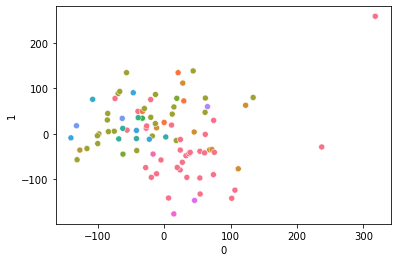

In [39]:
import seaborn as sns
sns.scatterplot(principalDf[0], principalDf[1], hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

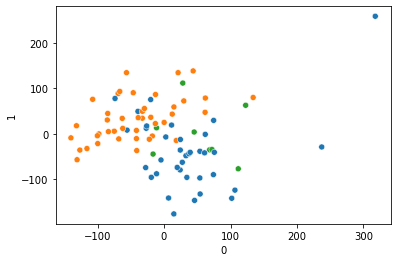

In [51]:
sns.scatterplot(principalDf[0], principalDf[1], hue = labels['hist_tags'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='2'>

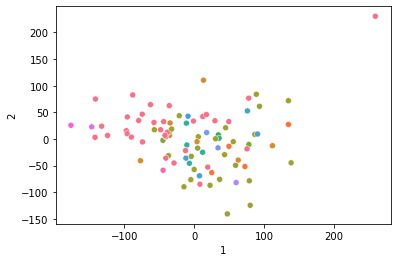

In [40]:
sns.scatterplot(principalDf[1], principalDf[2], hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='2'>

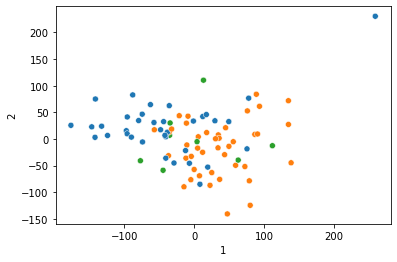

In [52]:
sns.scatterplot(principalDf[1], principalDf[2], hue = labels['hist_tags'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='2'>

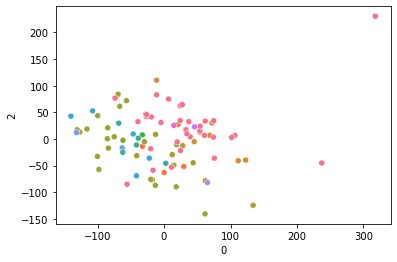

In [41]:
sns.scatterplot(principalDf[0], principalDf[2], hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='2'>

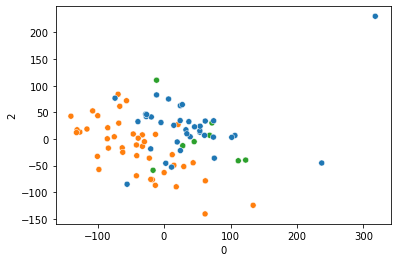

In [53]:
sns.scatterplot(principalDf[0], principalDf[2], hue = labels['hist_tags'], legend = False)

In [160]:
# no clear separation seen for 2 principle components so lets try clustering for all the ones needed to capture 85%
# try k-means clustering
# hierarchical clustering
labels.hist_tags.unique()

array(['Squamous Cell Carcinoma', 'Adenocarcinoma', 'Non-Small Cell',
       'other'], dtype=object)

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)
print(kmeans.labels_)
print(labels.hist_tags.values)

[2 0 2 3 0 0 1 3 3 0 1 2 3 2 3 0 0 0 0 2 2 0 0 3 0 3 2 0 3 0 0 3 0 0 3 0 2
 2 3 3 3 3 3 0 2 0 2 0 2 2 0 0 3 2 0 0 2 2 0 0 2 3 2 2 2 3 0 2 0 3 0 3 2 3
 3 2 2 2 0 3 3 3 3 0 3 0 2 3 0]
['Squamous Cell Carcinoma' 'Adenocarcinoma' 'Non-Small Cell'
 'Adenocarcinoma' 'Squamous Cell Carcinoma' 'Adenocarcinoma'
 'Squamous Cell Carcinoma' 'Adenocarcinoma' 'other' 'other'
 'Squamous Cell Carcinoma' 'Squamous Cell Carcinoma' 'Adenocarcinoma'
 'Squamous Cell Carcinoma' 'Adenocarcinoma' 'Squamous Cell Carcinoma'
 'Adenocarcinoma' 'Adenocarcinoma' 'Non-Small Cell'
 'Squamous Cell Carcinoma' 'Squamous Cell Carcinoma' 'Adenocarcinoma'
 'Non-Small Cell' 'Adenocarcinoma' 'Adenocarcinoma' 'Adenocarcinoma'
 'Squamous Cell Carcinoma' 'Squamous Cell Carcinoma' 'Adenocarcinoma'
 'Squamous Cell Carcinoma' 'Adenocarcinoma' 'Squamous Cell Carcinoma'
 'Adenocarcinoma' 'Squamous Cell Carcinoma' 'Adenocarcinoma'
 'Adenocarcinoma' 'Squamous Cell Carcinoma' 'Squamous Cell Carcinoma'
 'Adenocarcinoma' 'Adenocarcinoma'

In [131]:
from sklearn import metrics
k_means_ev = metrics.adjusted_rand_score(kmeans.labels_, labels.hist_tags.values)

print('Adjusted clustering score kmeans on PCs to cover 85% of variance for regrouped labels: {:0.3f}'.format(k_means_ev))

Adjusted clustering score kmeans on PCs to cover 85% of variance for regrouped labels: 0.280


The adjusted clustering score is 0.280, which is pretty low. It should be close to 1. Retry with all the labels (17) from the original annotation

In [132]:
kmeans = KMeans(n_clusters=len(labels['characteristics.tag.histology'].unique()), random_state=0).fit(principalDf)
print(kmeans.labels_)
k_means_ev_original_labels = metrics.adjusted_rand_score(kmeans.labels_, labels.hist_tags.values)

print('Adjusted clustering score kmeans on PCs to cover 85% of variance for original labels: {:0.3f}'.format(k_means_ev_original_labels))

[14  7 14  5 14  0 15  8  0  0  3 14  1 14  0  0  1  0 12 14 14 12  4  5
  7  0 14  0  0 12  7  8 13  0  1  0 14 14  8  8  8  1  8 12 14  0 14 12
 14 14 12 11  8 14 14 10 14 14  0 16 14  0 14 14  2  8  0  2 12  5  7 14
 14  5 13  2  2  0  0  5  9  8  5  7  0  0  6  8  0]
Adjusted clustering score kmeans on PCs to cover 85% of variance for original labels: 0.110


Even lower score is achieved. This might point to, that there is overlap and similar patterns for the subhistology types which makes separation of all subtypes impossible with this technique and the amount of samples per class.

In [114]:
print(labels.groupby('hist_tags')['hist_tags'].count())
print(labels.groupby('characteristics.tag.histology')['characteristics.tag.histology'].count())

hist_tags
Adenocarcinoma             42
Non-Small Cell              8
Squamous Cell Carcinoma    36
other                       3
Name: hist_tags, dtype: int64
characteristics.tag.histology
Adenocarcinoma With Mucinous Features                                    1
Adenocarcinoma With Papillary Features                                   2
Adenocarcinoma, Acinar Type                                              3
Adenocarcinoma, Bronchiolo-alveolar Features                             4
Adenocarcinoma, Mixed                                                    1
Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features               1
Adenocarcinoma, NOS                                                     25
Adenocarcinoma, Papillary, NOS                                           4
Carcinoma, Large Cell, Neuroendocrine                                    1
Non-Small Cell                                                           7
Non-Small Cell, Pleomorphic Type                            

The expected clusters would vary a lot in size, which might lead to non spheric shapes, which can lead to poor performance of the k-means clustering. Other clustering techniques to try could be hierarchical clustering, DBSCAN, spectral clustering. DBSCAN is probably not optimal choice, since it is based on density, which is way more unlikely to achieve for the smaller groups than the bigger groups, which makes them likely to be marked as outliers rather than clusters. Spectral clustering is tried later on the not dimensionality reduced data. Hierachical clustering is performed on the PCA data in the following:

In [133]:
from sklearn.cluster import AgglomerativeClustering
HAC = AgglomerativeClustering(n_clusters = 4,
                              affinity ='euclidean',
                              compute_full_tree = True, 
                             linkage = 'ward',
                             connectivity = None)

In [134]:
# HAC on original
HAC.fit(X)
y_pred_original_HAC = HAC.labels_.astype(int)

In [137]:
# HAC on PCA
HAC.fit(principalDf)
y_pred_PCA_HAC = HAC.labels_.astype(int)

In [138]:
ARI_HCA_Ori = metrics.adjusted_rand_score(y_pred_original_HAC, labels.hist_tags)
ARI_HCA_PCA = metrics.adjusted_rand_score(y_pred_PCA_HAC, labels.hist_tags)

print('Adjusted rand index for original data: {:0.3f}, adjusted rand index pca reduced data {:0.3f}'.format(ARI_HCA_Ori, ARI_HCA_PCA))

Adjusted rand index for original data: 0.399, adjusted rand index pca reduced data 0.413


Based on the outcome, PCA might not be the best approach of reducing the dimensionality of the gene expression data.

Try multidimensional scaling, which is not based on variances but on distances.

In [142]:
MDS_reduction = MDS(n_components=10, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=42,
dissimilarity='euclidean')

MDS_reduction

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 3
X_mds = MDS_reduction.fit_transform(X)
X_mds.shape
X_mds[:,:1].ravel().shape

(89,)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

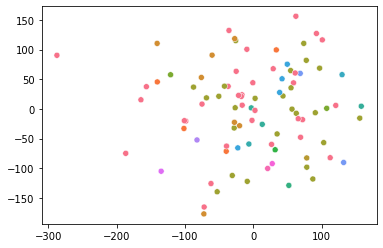

In [143]:
sns.scatterplot(X_mds[:,:1].ravel(), X_mds[:,1:2].ravel(), hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

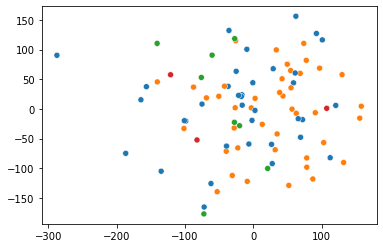

In [144]:
sns.scatterplot(X_mds[:,:1].ravel(), X_mds[:,1:2].ravel(), hue = labels['hist_tags'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

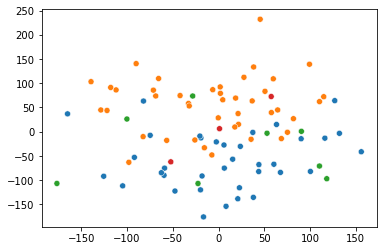

In [145]:
sns.scatterplot(X_mds[:,1:2].ravel(), X_mds[:,2:3].ravel(), hue = labels['hist_tags'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

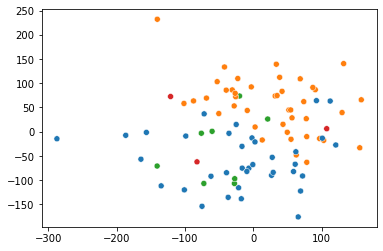

In [146]:
sns.scatterplot(X_mds[:,:1].ravel(), X_mds[:,2:3].ravel(), hue = labels['hist_tags'], legend = False)

In [148]:
#kMeans on MDS output
kmeans_MDS = KMeans(n_clusters=4, random_state=0).fit(X_mds)
print(kmeans_MDS.labels_)

[2 3 2 3 2 0 2 0 0 0 1 2 3 2 3 0 0 0 1 2 2 1 1 0 3 0 2 0 0 1 3 0 3 0 3 0 2
 2 0 0 0 3 0 1 2 0 2 1 2 2 1 1 0 2 2 1 2 2 2 1 2 3 2 2 2 0 2 2 1 0 3 1 2 0
 3 2 2 2 0 0 1 0 3 3 0 0 2 0 0]


In [149]:
k_means_MDS_ev = metrics.adjusted_rand_score(kmeans_MDS.labels_, labels.hist_tags.values)

print('Adjusted clustering score kmeans on MDS reduced data for regrouped labels: {:0.3f}'.format(k_means_MDS_ev))

Adjusted clustering score kmeans on MDS reduced data for regrouped labels: 0.276


In [150]:
# hierarchical clustering
HAC.fit(X_mds)
y_pred_MDS_HAC = HAC.labels_.astype(int)

In [152]:
HAC_MDS_ev = metrics.adjusted_rand_score(y_pred_MDS_HAC, labels.hist_tags.values)

print('Adjusted clustering score kmeans on MDS reduced data for regrouped labels: {:0.3f}'.format(HAC_MDS_ev))

Adjusted clustering score kmeans on MDS reduced data for regrouped labels: 0.277


That was not too flattering so far. Lets try spectral embedding

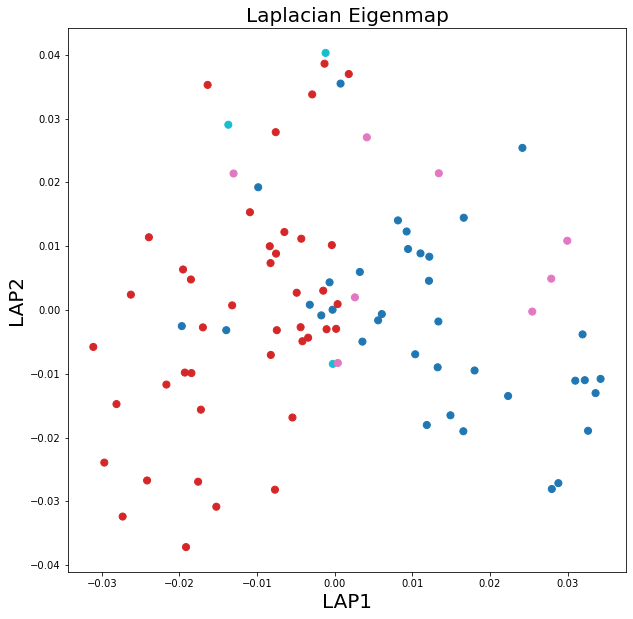

In [167]:
from sklearn.manifold import SpectralEmbedding
spec_emb = SpectralEmbedding(n_components = 2, n_neighbors = 50)
se = spec_emb.fit_transform(X)
se
plt.figure(figsize=(10,10))
plt.scatter(se[:, 0], se[:, 1], c = labels.hist_tags.map({'Squamous Cell Carcinoma':1, 'Adenocarcinoma':2, 'Non-Small Cell':3, 'other':4}), cmap = 'tab10', s = 50)
plt.title('Laplacian Eigenmap', fontsize = 20)
plt.xlabel("LAP1", fontsize = 20)
plt.ylabel("LAP2", fontsize = 20)
plt.show()

In [170]:
# clustering on this embedding
kmeans_spec = KMeans(n_clusters=4, random_state=0).fit(se)
print(kmeans_spec.labels_)

[3 2 3 0 2 2 1 2 2 1 1 3 0 2 0 2 2 0 1 2 2 1 1 0 2 2 2 2 2 2 0 2 0 2 2 2 3
 3 2 2 2 0 2 1 3 2 2 1 2 3 2 1 0 2 2 1 3 3 1 1 2 0 2 3 3 2 2 3 2 0 0 2 3 0
 0 3 3 3 2 0 2 0 0 2 2 2 3 2 1]


In [171]:
k_means_spec_ev = metrics.adjusted_rand_score(kmeans_spec.labels_, labels.hist_tags.values)

print('Adjusted clustering score kmeans on spectral embedding reduced data for regrouped labels: {:0.3f}'.format(k_means_spec_ev))

Adjusted clustering score kmeans on spectral embedding reduced data for regrouped labels: 0.139


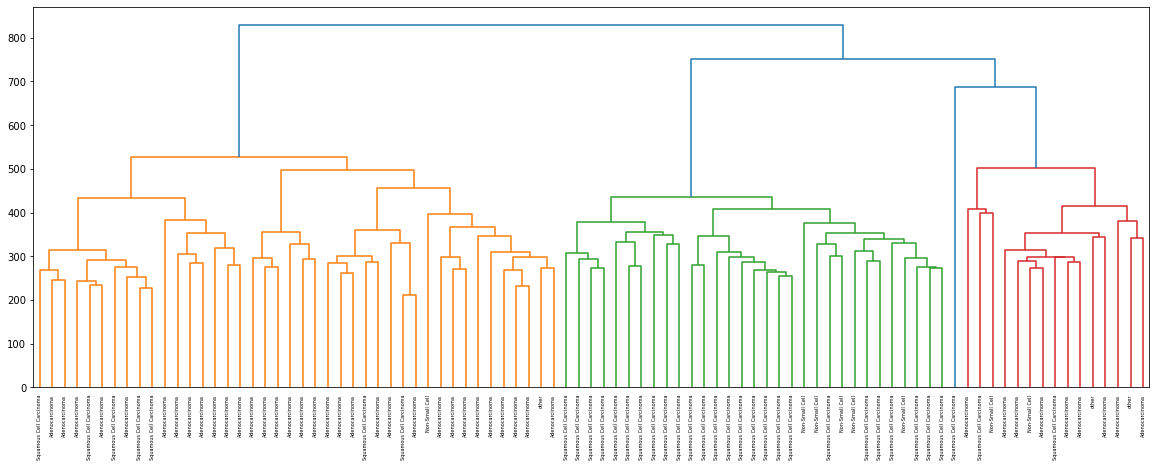

In [183]:
from scipy.cluster import hierarchy
Original = hierarchy.linkage(X, method = 'ward')
plt.figure(figsize= (20, 7))
# Make the dendrogram
den = hierarchy.dendrogram(Original, 
                           truncate_mode = None,
                           labels = labels.hist_tags.values
                          )
plt.show()

In [179]:
#spectral graph partitoning
spec_clustering = SpectralClustering(n_clusters=4,
         assign_labels='discretize',
         random_state=0).fit(X)

print(spec_clustering.labels_)

[0 1 3 3 3 2 3 0 0 0 0 1 2 0 2 3 0 1 1 3 3 1 0 0 2 3 1 2 2 1 0 3 1 2 2 0 0
 1 0 2 2 2 3 0 2 2 2 2 1 3 1 2 0 2 3 1 2 0 2 2 1 2 2 3 3 1 3 0 3 0 0 0 2 3
 2 3 3 3 1 1 1 1 2 1 1 0 3 0 3]


C:\Users\chiar\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [177]:
spec_ev = metrics.adjusted_rand_score(spec_clustering.labels_, labels.hist_tags.values)

print('Adjusted clustering score kmeans on spectral clustering for regrouped labels: {:0.3f}'.format(spec_ev))

Adjusted clustering score kmeans on spectral clustering for regrouped labels: -0.004


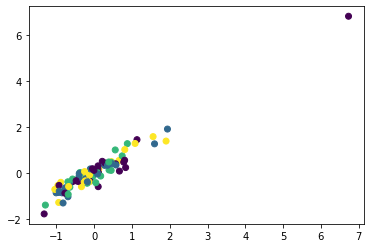

In [178]:
plt.scatter(X[:,0], X[:,1], c=spec_clustering.labels_)

In [184]:
# tSNE
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42)
#fit 
X_embedded = X_embedded.fit_transform(X)
# produced an two dimension array with x,y features for every row, since n_components = 2
X_embedded.shape

(89, 2)

In [190]:
def plot_cluster(X, df):
    #add x, y features to the original df
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    sns.scatterplot(x = 'x', y = 'y', hue = labels.hist_tags, data = df, alpha = 0.5, palette=['red','blue', 'green','pink'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

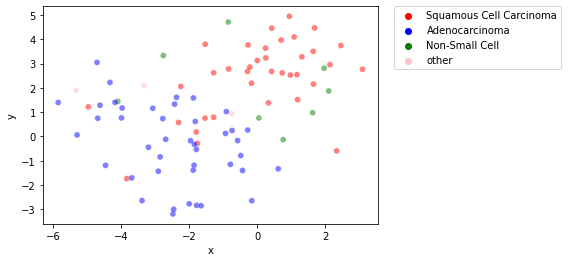

In [191]:
plot_cluster(X_embedded, data)

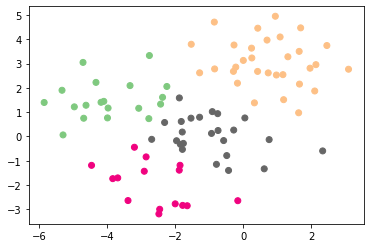

In [204]:
kmeans = KMeans(n_clusters=4, random_state=0, init = 'k-means++')
kTNSE = kmeans.fit_predict(X_embedded)

plt.scatter(x= X_embedded[:,0], y=X_embedded[:,1], c=kTNSE, cmap='Accent')

In [206]:
tsne_ev = metrics.adjusted_rand_score(kTNSE, labels.hist_tags.values)

print('Adjusted clustering score kmeans on tSNE for regrouped labels: {:0.3f}'.format(tsne_ev))

Adjusted clustering score kmeans on tSNE for regrouped labels: 0.291
